## Citirea fsierului cu info IMBD

Creati un fisier  in jupyter notebook cu denumirea pandas_avasnsat.ipynb
Importam bibliotecile


In [13]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

In [14]:
csv = pd.read_csv("dataset/imbd_superhero.csv", 
                  header=None, 
                  names=['An', 'Titlu','Organizatia', 'IMBD', 'AltRating', 'DataX', 'UnknownColumn', 'PretMediulaBilet', 'NrDeSpectatori', 'TopPentruAncutare'])
csv.head(8)

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3.190318e+06,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5.241830e+06,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4.238843e+06,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1.707812e+06,235824902
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1.366613e+06,240132887
6,1987,Superman IV: The Quest for Peace,DC,3.6,10,23.0,5683122.0,3.91,1.453484e+06,242288918
7,1989,Batman,DC,7.6,71,73.5,40489746.0,3.97,1.019893e+07,246819230


In [15]:
Vedem multe valori NaN - Not a Nuber. In numpy este o functie care detecteaza aceste valori si le eilmina utilizand functia isfinite()

SyntaxError: invalid syntax (<ipython-input-15-feb936b9f822>, line 1)

In [16]:
new_csv = csv[np.isfinite(csv.UnknownColumn)].append(csv[np.isfinite(csv.NrDeSpectatori)])

new_csv.head(8)

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3.190318e+06,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5.241830e+06,227224681
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4.238843e+06,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1.707812e+06,235824902
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1.366613e+06,240132887
6,1987,Superman IV: The Quest for Peace,DC,3.6,10,23.0,5683122.0,3.91,1.453484e+06,242288918
7,1989,Batman,DC,7.6,71,73.5,40489746.0,3.97,1.019893e+07,246819230
10,1992,Batman Returns,DC,7.0,78,74.0,45687711.0,4.15,1.100909e+07,255029699


vrem sa comparam coloanele imbd cu AltRating. pentru a face acest lucru trebuie sa normalizam datelele.

In [17]:
#Normalizam scorurile 
imbd_normalizat = new_csv.IMBD/10 #nota imbd din 10
new_csv.insert(10, 'IMBD_normalizat', imbd_normalizat)

In [18]:
altrating_normalizat = new_csv.AltRating/100 #scorul din 100
new_csv.insert(9, 'AltRating_normalizat', altrating_normalizat)

In [19]:
new_csv.head()

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,AltRating_normalizat,TopPentruAncutare,IMBD_normalizat
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,0.95,222584545,0.73
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,0.88,227224681,0.67
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,0.24,233791994,0.49
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,0.08,235824902,0.42
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1366613.477,0.16,240132887,0.43


### graficul, distributia si corelatii

## Graficul

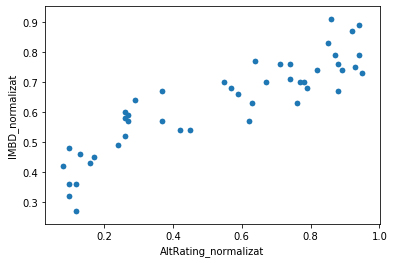

In [20]:
new_csv.plot.scatter(y = 'IMBD_normalizat', x = 'AltRating_normalizat')

## corelare

Putem vedea  din grafic o corelatie pozitiva dintre date. Ar fi bine totusi sa va verificam cat de puternica este corelatia. Pandas ofera o metada numita corr() pentru a calcula corelatiile.
Nu trebuie sa facem acest lucru pentru intreg DataFrame-ul, ci numai pentru coloanele in cauza.

In [21]:
new_csv[['IMBD_normalizat', 'AltRating_normalizat']].corr()

,IMBD_normalizat,AltRating_normalizat
IMBD_normalizat,1.00000,0.88836
AltRating_normalizat,0.88836,1.00000


Am obtinut matricea de corelare. Corelarea este 0.888, una foarte buna. Similaritatea dintre note este foarte mare. 

## Descrierea coloanelor

Utilizand fucntia describe() din pandas putem afla informatie despre fiecare coloana in parte, precum media, devierea de la standard, etc.

In [22]:
new_csv[['IMBD_normalizat', 'AltRating_normalizat']].describe()

,IMBD_normalizat,AltRating_normalizat
count,92.000000,92.000000
mean,0.630000,0.539783
std,0.152056,0.300465
min,0.270000,0.080000
25%,0.540000,0.260000
50%,0.665000,0.605000
75%,0.740000,0.820000
max,0.910000,0.950000


## Linia de tendita / trend

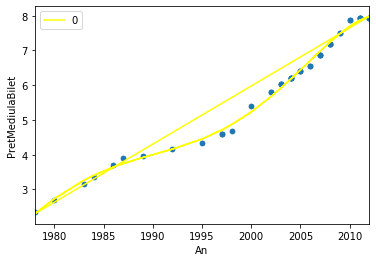

In [23]:
plot = new_csv.plot.scatter(x = 'An', y = 'PretMediulaBilet')
z = np.polyfit(x=new_csv.An, y=new_csv.PretMediulaBilet, deg=5) #polinom de gradul 5 inseamna deg=5
p = np.poly1d(z)
trendline = pd.DataFrame(data=p(new_csv.An), index=new_csv.An)
trendline.plot.line(ax=plot, color='Yellow')

De realizat:
1. Definiti o serie pandas.
2. Definiti un dataframe in pandas.
3. Cum veti afisa numai filmele de la DC pentru DataFrame-ul new_csv?
4. Cum veti afisa numai anul si titlu pentru filmele de la  Marvel?
5. Desenati graficul pentru PretulMediuLaBilet cu Anul pe axa y. Culoarea liniei sa fie neagra.

In [46]:

newSerie = Series(csv['Titlu'])
type(newSerie)

pandas.core.series.Series

In [45]:
columns  = csv[['Titlu', 'An']] 
dataframe = DataFrame( columns )
type(dataframe)

pandas.core.frame.DataFrame

In [48]:
result = csv[csv['Organizatia'] == 'DC']
result

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3.190318e+06,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5.241830e+06,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4.238843e+06,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1.707812e+06,235824902
6,1987,Superman IV: The Quest for Peace,DC,3.6,10,23.0,5683122.0,3.91,1.453484e+06,242288918
7,1989,Batman,DC,7.6,71,73.5,40489746.0,3.97,1.019893e+07,246819230
8,1989,The Return of Swamp Thing,DC,3.9,40,39.5,NaN,3.97,NaN,246819230
10,1992,Batman Returns,DC,7.0,78,74.0,45687711.0,4.15,1.100909e+07,255029699
11,1995,Batman Forever,DC,5.4,42,48.0,52784433.0,4.35,1.213435e+07,262803276


In [54]:
marvel = csv[ csv['Organizatia'] == 'Marvel' ]

In [55]:
marvel_an_titlu = csv[ [ 'An', 'Titlu' ]]
marvel_an_titlu

,An,Titlu
0,1978,Superman
1,1980,Superman II
2,1982,Swamp Thing
3,1983,Superman III
4,1984,Supergirl
5,1986,Howard the Duck
6,1987,Superman IV: The Quest for Peace
7,1989,Batman
8,1989,The Return of Swamp Thing
9,1989,The Punisher


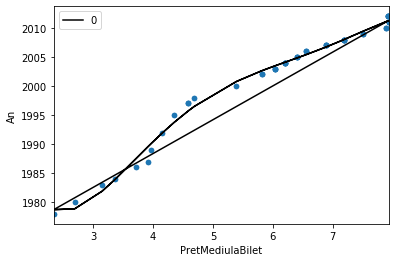

In [61]:
plot = new_csv.plot.scatter(y = 'An', x = 'PretMediulaBilet')
z = np.polyfit(y=new_csv.An, x=new_csv.PretMediulaBilet, deg=5) #polinom de gradul 5 inseamna deg=5
p = np.poly1d(z)
trendline = pd.DataFrame(data=p(new_csv.PretMediulaBilet), index=new_csv.PretMediulaBilet)
trendline.plot.line(ax=plot, color='Black')

In [57]:
plot

In [ ]:
Concluzie:
    Am utilizat pentru prima data jupiter nootbook, dupa ce am reusit sa-l instalez si sa-l configurez si instalarea de packages
    Am efectuat manipulat cu datele de tip csv utilizand numpy si panda
    